# Introduction to Convolutional Neural Networks (ConvNets)

Convolutional Neural Networks (ConvNets) are a class of deep learning models that are particularly well-suited for processing data that has a grid-like topology, such as images. They are inspired by the biological visual cortex of animals.

## The Convolution Operation

The convolution operation is the fundamental building block of ConvNets. It involves sliding a small matrix, called a filter or kernel, over the input data and computing a dot product at each position. This operation helps to extract features from the input data.

Mathematically, the 2D convolution of an input image $I$ and a kernel $K$ is defined as:

$$ (I * K)(i, j) = \sum_m \sum_n I(i - m, j - n) K(m, n) $$

where $(i, j)$ are the coordinates in the output feature map, and $(m, n)$ are the coordinates in the kernel.

### Visualizing Convolution

Let's consider a simple example of 2D convolution.

Input Image $I$:

$$
\begin{pmatrix}
1 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 & 0 \\
0 & 1 & 1 & 0 & 0
\end{pmatrix}
$$

Kernel $K$:

$$
\begin{pmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{pmatrix}
$$

The resulting feature map will be smaller than the input image, depending on the padding and stride used.

### Convolution with Real Data (Example using scikit-learn's digits dataset)

Let's use a sample image from scikit-learn's digits dataset to demonstrate convolution. We will use a simple edge detection kernel.

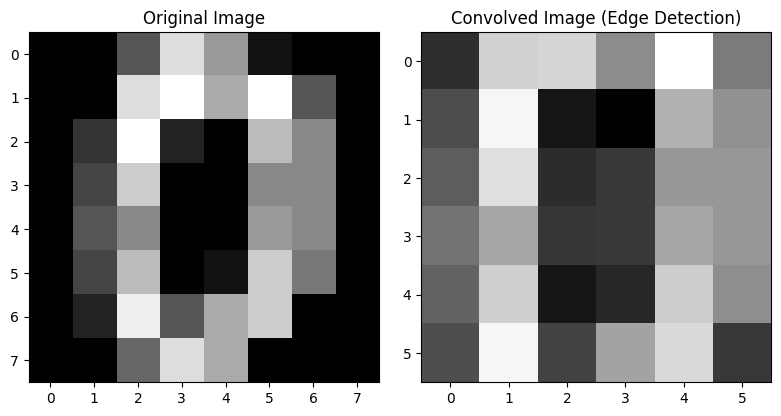

In [ ]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
image = digits.images[0] # Get the first digit image

# Simple edge detection kernel
edge_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Perform convolution
convolved_image = convolve2d(image, edge_kernel, mode='valid')

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image (Edge Detection)')

plt.tight_layout()
plt.show()

## The Max-Pooling Operation

Max-pooling is a down-sampling operation that reduces the spatial dimensions (width and height) of the feature maps. It works by sliding a window over the input and taking the maximum value within that window. This helps to reduce the number of parameters and computation in the network, and also provides some translational invariance.

### Visualizing Max-Pooling

Consider a 2x2 max-pooling operation with a stride of 2 on the following input:

$$
\begin{pmatrix}
1 & 1 & 2 & 4 \\
5 & 6 & 7 & 8 \\
3 & 2 & 1 & 0 \\
1 & 2 & 3 & 4
\end{pmatrix}
$$

The output after max-pooling would be:

$$
\begin{pmatrix}
6 & 8 \\
3 & 4
\end{pmatrix}
$$

Each element in the output is the maximum value from the corresponding 2x2 window in the input.

### Code Example: Max-Pooling

We can implement a simple max-pooling operation using NumPy.

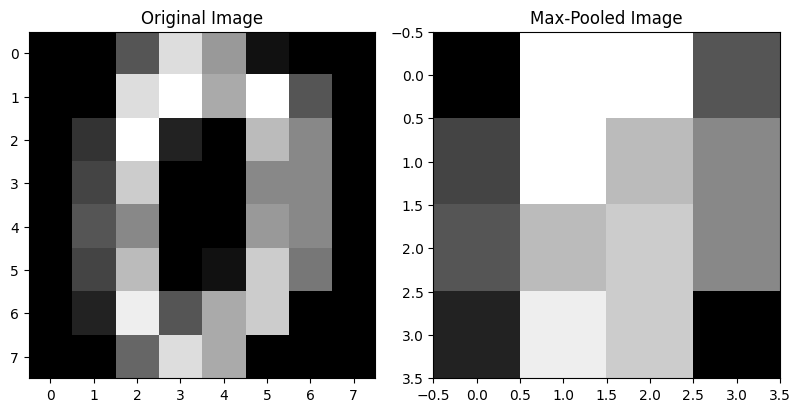

In [ ]:
def max_pooling(input_array, pool_size=(2, 2), stride=(2, 2)):
    h_in, w_in = input_array.shape
    h_pool, w_pool = pool_size
    h_stride, w_stride = stride

    h_out = (h_in - h_pool) // h_stride + 1
    w_out = (w_in - w_pool) // w_stride + 1

    output_array = np.zeros((h_out, w_out))

    for i in range(h_out):
        for j in range(w_out):
            h_start = i * h_stride
            h_end = h_start + h_pool
            w_start = j * w_stride
            w_end = w_start + w_pool
            output_array[i, j] = np.max(input_array[h_start:h_end, w_start:w_end])

    return output_array

# Apply max-pooling to the original digit image
pooled_image = max_pooling(image, pool_size=(2, 2), stride=(2, 2))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(pooled_image, cmap='gray')
plt.title('Max-Pooled Image')

plt.tight_layout()
plt.show()


## Conclusion

This notebook provided an introduction to two fundamental operations in Convolutional Neural Networks: convolution and max-pooling.

- **Convolution** helps in extracting features by applying learnable filters to the input data.
- **Max-pooling** reduces the spatial dimensions of the feature maps, helping to reduce computation and provide translational invariance.

These operations, when stacked together in multiple layers, form the basis of powerful ConvNet architectures capable of learning complex patterns in image data.